In [6]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]

In [7]:
df = pd.read_csv('data_eda_1.csv',index_col=0)
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,IncomeGroup_Low income,IncomeGroup_Medium income,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_Low,CreditRating_Medium,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Professional,New_maritalstatus_Yes
0,1,-1.089034,-0.422798,-1.125036,-0.044197,-0.995504,-0.621914,-0.566549,-0.450622,-0.889336,-0.306586,-0.568253,-0.824996,-0.604886,0.460593,-1.610162,-1.182049,0.012439,-0.218215,-0.899446,-0.068108,-0.150674,2.477643,1.165226,-0.581885,0.807270,1.119678,0.107745,1.172978,-0.940475,5.452813,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,1,-1.556158,-1.937776,-1.450779,-0.912074,-0.995504,-0.621914,0.018886,0.088432,-1.200278,-1.216280,-1.013639,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.319026,-1.537118,-1.429573,-0.068108,-0.897074,2.388088,-0.760155,-0.581885,0.807270,-0.767089,3.053676,0.489551,1.056411,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,1
2,0,-0.420564,-1.998448,-0.272519,-0.912074,-0.995504,-0.621914,0.026624,0.088432,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.495143,-1.466096,-1.182049,-1.665568,-1.154741,-1.675080,-0.068108,-0.897074,2.448340,-0.760155,-0.581885,-0.850485,-0.767089,3.614747,-0.022125,0.852418,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1
3,0,0.826362,1.392611,1.180063,1.170112,-0.995504,-0.621914,0.655061,0.284291,2.228625,1.290204,1.349529,1.501970,1.946418,0.941048,2.908416,2.064116,2.505608,1.813093,2.044460,-0.068108,1.849625,2.418494,1.165226,1.348420,1.895246,1.700472,0.466880,0.132730,-0.940475,-0.183392,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,1,-1.544648,-2.469987,-1.450779,-0.912074,-0.995504,-0.621914,0.034384,0.083251,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.898531,-1.807759,-1.675080,-0.068108,-0.897074,2.226882,1.165226,1.348420,1.594044,1.552675,1.628558,0.687544,1.160087,-0.183392,-0.132239,-0.221591,5.190155,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1


In [8]:
df_feature = df.drop('Churn', axis = 1)
df_target = df['Churn']

# Distribution of dependent variable.

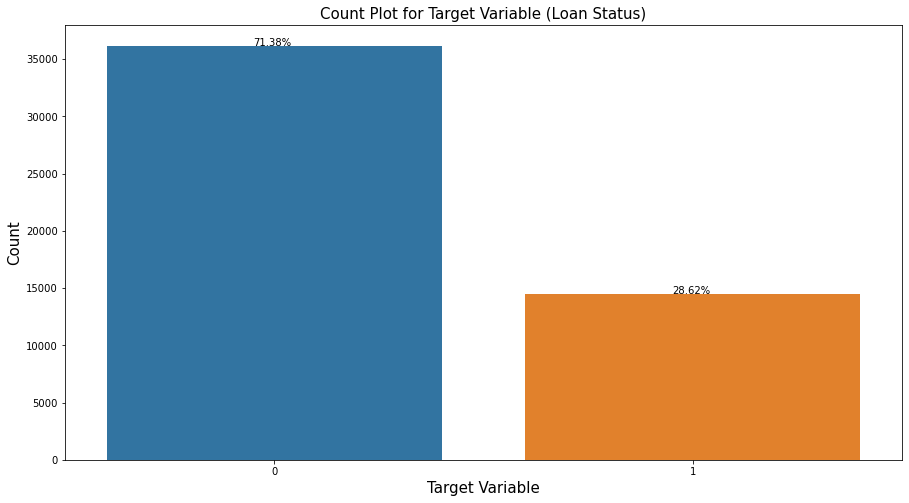

In [9]:
# get counts of 0's and 1's in the 'Loan Status' variable
df_target.value_counts()

# plot the countplot of the variable 'Loan Status'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Loan Status)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

# Train-Test Split

Before applying various classification techniques to predict the Churn, let us split the dataset in train and test set

In [10]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
df_1 = sm.add_constant(df_feature)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
x_train, x_test ,y_train ,y_test = train_test_split(df_feature,df_target, random_state=1, test_size=0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35475, 57)
y_train:  (35475,)
x_test:  (15204, 57)
y_test:  (15204,)


### Create a generalized function to create a dataframe containing the scores for the models.

In [11]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(x_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

# Logistic Regression (Full Model)

Build a full logistic model on a training dataset

In [12]:
# build the model on train data (x_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train,x_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.579127
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                35475
Model:                          Logit   Df Residuals:                    35418
Method:                           MLE   Df Model:                           56
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                 0.03371
Time:                        21:07:56   Log-Likelihood:                -20545.
converged:                       True   LL-Null:                       -21261.
Covariance Type:            nonrobust   LLR p-value:                5.966e-263
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
MonthlyRevenue                  0.1797      0.027      6.742      0.000   

Interpretation: The Pseudo R-squ. obtained from the above model summary is the value of McFadden's R-squared. This value can be obtained from the formula:

McFadden's R-squared = 1−𝐿𝑜𝑔−𝐿𝑖𝑘𝑒𝑙𝑖ℎ𝑜𝑜𝑑𝐿𝐿−𝑁𝑢𝑙𝑙

Where,
Log-Likelihood: It is the maximum value of the log-likelihood function

LL-Null: It is the maximum value of the log-likelihood function for the model containing only the intercept

The LLR p-value is less than 0.05, implies that the model is significant.

There are different types of pseudo R-squared such as Cox & Snell R-squared.

Cox & Snell R-squared: The convergence of the logistic model can be determined by the R-squared value. It is given by the formula:

Cox & Snell R-squared =  1−(𝐿(𝑀𝐼𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡)𝐿(𝑀𝐹𝑢𝑙𝑙))2/𝑁
 

Where,
L(M): The conditional probability of target variable given the independent variables
N: Total number of observations

Note: The maximum of Cox & Snell R-squared is always less than 1. By above model Cox & Snell R-squared is less than 1 i.e (0.03369).

#### Calculate the AIC (Akaike Information Criterion) value.
It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [13]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 41203.06372761636


### Interpret the odds for each variable

In [14]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
MonthlyRevenue,1.196808
MonthlyMinutes,0.764841
TotalRecurringCharge,0.916537
DirectorAssistedCalls,0.994030
OverageMinutes,1.123796
RoamingCalls,1.017305
PercChangeMinutes,0.860288
PercChangeRevenues,1.103630
DroppedCalls,1.129897
BlockedCalls,1.038340


Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1

## Do predictions on the test set.

In [15]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(x_test)

# print the y_pred_prob
y_pred_prob.head()

15621   0.171224
15496   0.333145
29727   0.280419
33778   0.146468
22135   0.389994
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1

In [16]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [17]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 0, 0, 0, 0]

## Plot the confusion matrix.

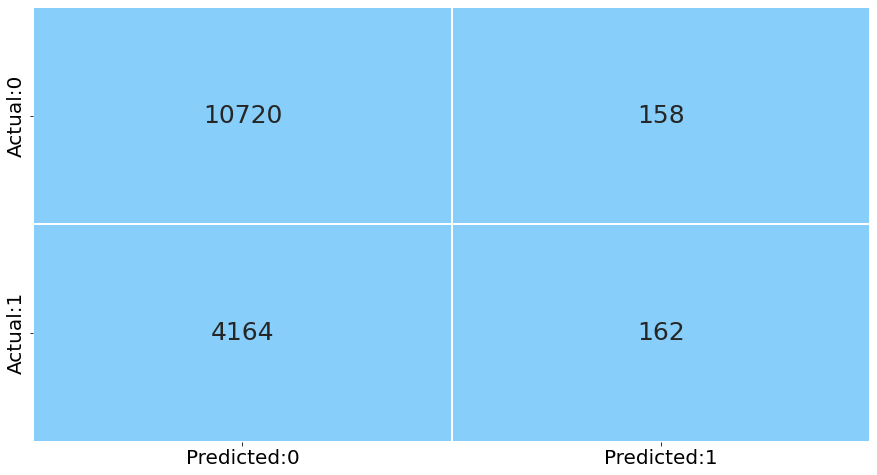

In [18]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [19]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10878
           1       0.51      0.04      0.07      4326

    accuracy                           0.72     15204
   macro avg       0.61      0.51      0.45     15204
weighted avg       0.66      0.72      0.62     15204



Interpretation:

From the above output, we can infer that the recall of the positive class is known as sensitivity and the recall of the negative class is specificity.

support is the number of observations in the corresponding class.

The macro average in the output is obtained by averaging the unweighted mean per label and the weighted average is given by averaging the support-weighted mean per label

### Kappa score
It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [20]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.031788466346356126


Interpretation: As the kappa score for the full model (with cut-off probability 0.5) is 0.031788, we can say that there is substantial agreement between the actual and predicted values.

## Plot the ROC curve
ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

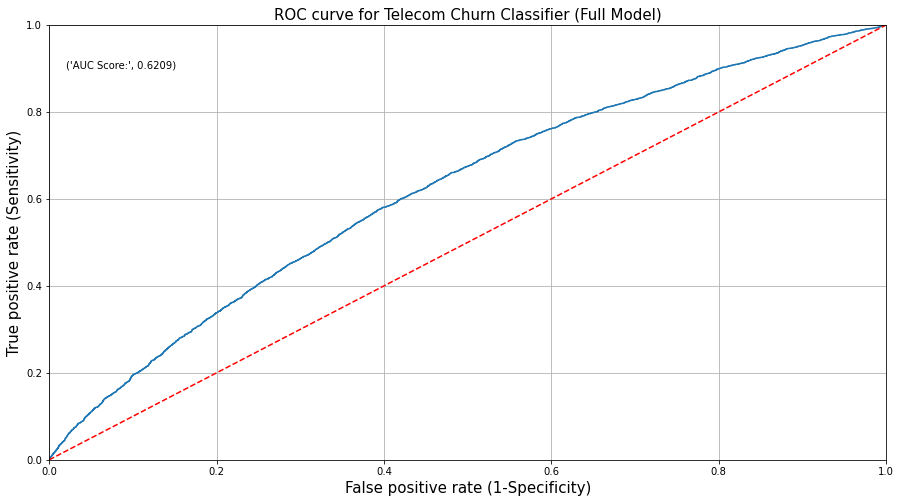

In [21]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Telecom Churn Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

### Interpretation:
The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.621.

In [22]:
metrics.accuracy_score(y_test, y_pred)

0.7157327019205473

In [23]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

In [24]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.620871,0.285166,0.995839,0.288542,0.001772,0.443370
1,0.200000,0.620871,0.308081,0.902450,0.395554,0.060986,0.459348
2,0.300000,0.620871,0.370827,0.541840,0.608064,0.154748,0.440312
3,0.400000,0.620871,0.433700,0.173139,0.700408,0.101619,0.247481
4,0.500000,0.620871,0.506250,0.037448,0.715733,0.031788,0.069737
5,0.600000,0.620871,0.576923,0.006935,0.715996,0.006993,0.013705
6,0.700000,0.620871,0.666667,0.000925,0.715601,0.001059,0.001847
7,0.800000,0.620871,0.000000,0.000000,0.715470,0.000000,0.000000
8,0.900000,0.620871,0.000000,0.000000,0.715470,0.000000,0.000000


#### Interpretation: The above dataframe shows that, the model cut_off probability 0.6, returns the highest AUC score, f1-score, kappa score and accuracy.

### In the above method, we passed the list of values for the cut-off. But, this method is not efficient as one can pass different values and obtain a cut-off based on the passed values.
To obtain the optimal cut-off value we use the following methods:


Youden's Index

Cost-based Method

# ------------------------------------------------------------------------------------------